# SYRIATEL CUSTOMER CHURN

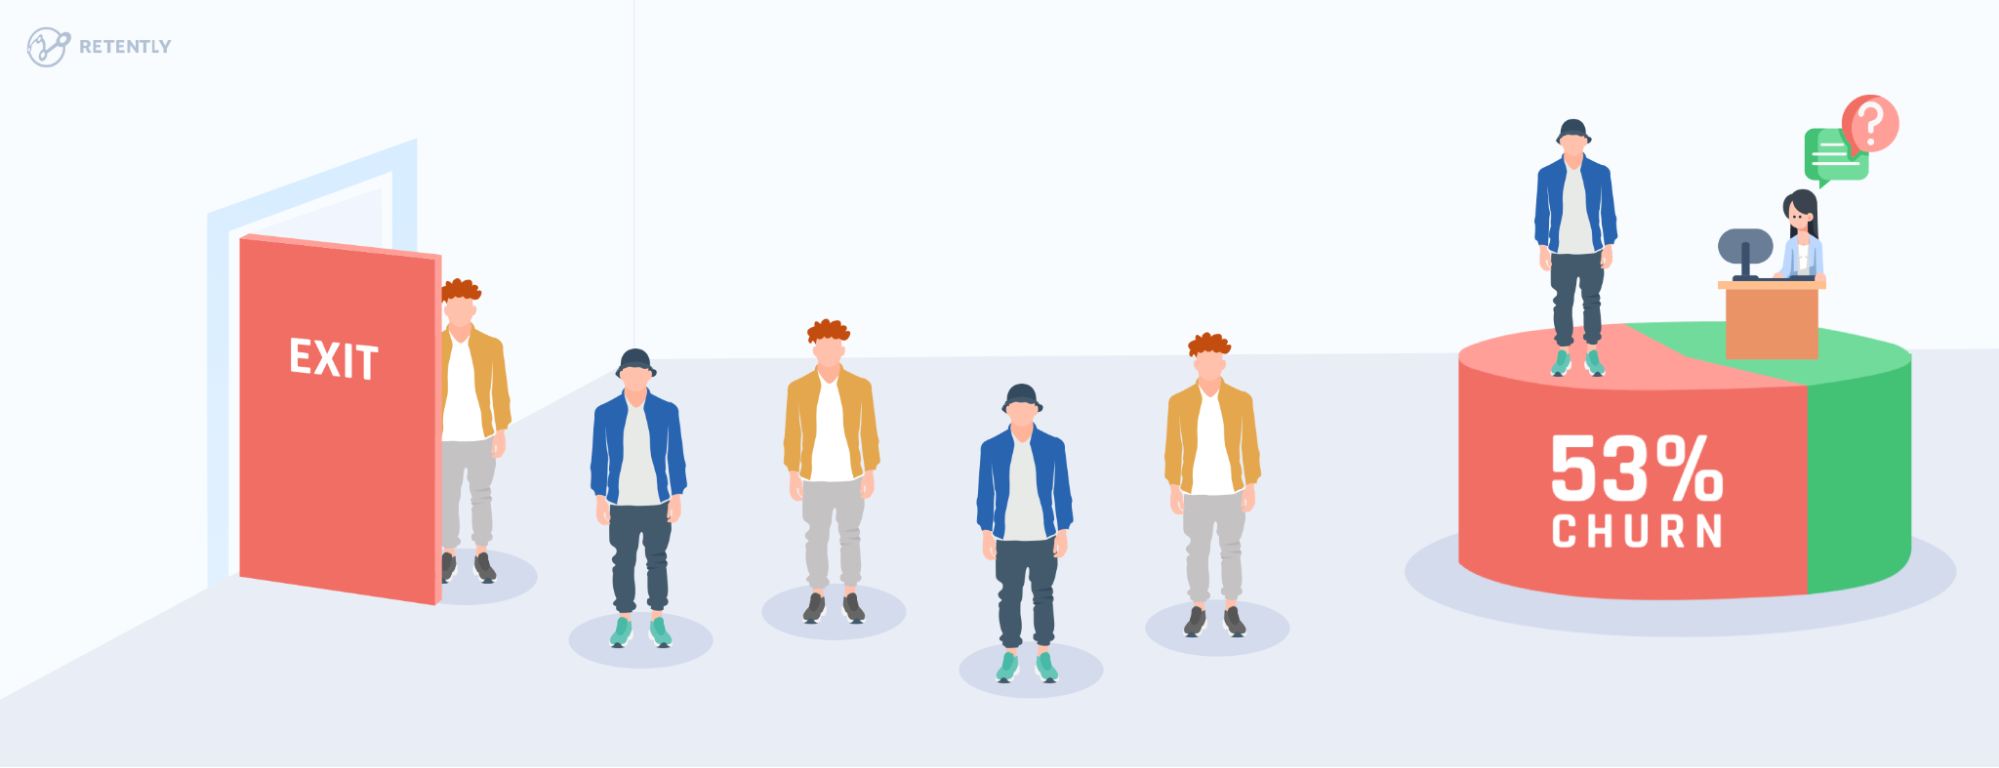

### Instructors
* Samuel Karu 
* Nikita Njoroge
* Anthony Muiko
* Lucille Kaleha

#### Repository Link:

Student Name : Leah Katiwa

Pace : Full Time

## Business Problem

##  Introduction

 SyriaTel has tasked me to provide prediction analysis on whether their customers will churn soon. To churn means "A measure of the number of individuals or items moving out of a collective group over a specific period." 

## 1. Project Overview



SyriaTel is a telecommunications company hoping to foresee and prevent client churn. Customer churn is the percentage of clients that quit utilizing an company's product or service during a specific time span.  This project aims to provide insights into the determining factors leading to customer  churning as well as predict future cases of churn using different models in order to provide adequate recommendations to the company. This will in turn help to retain customers / product consumers who would otherwise churn.

This helps in improve the health of the SyriaTel sevices while assisting in the forecasting of future revenue for the business. Building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, would then provide information on patterns that may exist and shed light on the problem.SyriaTel itself who are interested in how to improve their customer rettention rates.

### 1.1 Problem Statement

Telecommunication services in Syria are highly regulated. Although urban areas can make use of the network built and maintained by the government-owned incumbent Syrian Telecommunications Establishment (STE), many underserved remote areas in the countryside are obliged to rely on satellite communications. The domestic and international fixed-line markets in Syria remain the monopoly of the STE, despite several initiatives over the years aimed at liberalising the market.

Mobile broadband penetration in Syria is still quite low, despite quite a high population coverage of 3G networks and some deployment of LTE infrastructure. This may provide potential opportunities for growth once infrastructure and economic reconstruction efforts make headway, and civil issues subside.
SyriaTel has tasked me to build a  precise classifier model to predict whether a customer will ("soon") stop doing business with SyriaTel Company.

#### 1.2 Objective

#### Main Objective

The main objective is to come up with a predictive /accurate model that is an improvement of the baseline model to assist SyriaTel in reducing how much money is lost because of customers who don't stick around very long.

#### Specific Objective

* To determine if international plan  has influence in customer churn ? 
* To find whether customer total charge has supremacy on  customer churn
* To determine whether  total day charge has effect on the customer churn

### 1.3 Experimental Design Taken.

#### `Data`:

The title of this dataset is called "Churn in Telecom's dataset" from kaggle.com


Number of records: 3333

Number of columns: 21

Target variable: churn




#### `Models`:

Baseline model: Logistic regression

Model 1: Decision tree

Model 2: Random forest

model 3: K-Nearest Neighbor

#### `Evaluation Metric`:
I have elected to use <b>Recall</b> as my evaluation metric for this particular project. The recall score is true positive divided by the true positive plus the false negative. It is the measure of actual observations which are predicted correctly. I chose this metric because we want to capture as many positives as possible, and is the best metric to use when we have imbalanced data

# Column Descriptions
---
- <code><b>state</b></code>, string. 2-letter code of the US state of customer residence
- <code><b>account_length</b></code>, numerical. Number of months the customer has been with the current telco provider
- <code><b>area_code</b></code>, string="area_code_AAA" where AAA = 3 digit area code.
- <code><b>international_plan</b></code>, (yes/no). The customer has international plan.
- <code><b>voice_mail_plan</b></code>, (yes/no). The customer has voice mail plan.
- <code><b>number_vmail_messages</b></code>, numerical. Number of voice-mail messages.
- <code><b>total_day_minutes</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_calls</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_charge</b></code>, numerical. Total charge of day calls.
- <code><b>total_eve_minutes</b></code>, numerical. Total minutes of evening calls.
- <code><b>total_eve_calls</b></code>, numerical. Total number of evening calls.
- <code><b>total_eve_charge</b></code>, numerical. Total charge of evening calls.
- <code><b>total_night_minutes</b></code>, numerical. Total minutes of night calls.
- <code><b>total_night_calls</b></code>, numerical. Total number of night calls.
- <code><b>total_night_charge</b></code>, numerical. Total charge of night calls.
- <code><b>total_intl_minutes</b></code>, numerical. Total minutes of international calls.
- <code><b>total intl calls</b></code>, numerical. Total number of international calls.
- <code><b>total intl charge</b></code>, numerical. Total charge of international calls
- <code><b>number customer service calls</b></code>, numerical. Number of calls to customer service
- <code><b>churn</b></code>, (yes/no). Customer churn - target variable.

## 2. Data Exploration & Data Preparation

In [71]:
#import modules and packages

#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels as statsmd

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV # for splitting the dataset into test and train
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,FunctionTransformer # to scale the numeric features
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report # performance metrics
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor



# Algorithms for supervised learning methods.

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,precision_recall_fscore_support, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

# Business and Data undertstanding

#### Business Understanding



In [72]:
#import main data file and view the first 5 columns using the .head function.
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

*This segment is meant to  help us view and understand the data as well as get the domain knowlede needed for our analysis.*


In [73]:
# creating a function  to view our data
def describe_columns(self):
    print(self.columns)#listing the columns in our dataset
    print(self.shape) #Checking for the number of rows and columns in our DataFrame
    print(self.info())#summary of the DataFrame's structure,number of rows and columns, the columns data types , count of non-null values in each column
    print(self.describe()) # Describing the data with inferential statistics.

In [74]:
describe_columns(churn_data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333

`Insights`:
- The data has a total of 21 columns
- The data has  3333 rows and 21 columns
- The longest customer account length in SyriaTel is 243 the smallest is 1 majority of the customers have an account length of 101
- There are only 3 area codes
- The standard  deviation for total night charge ,total evening charge,total day charge are    2.28 , 4.31 , 9.26 respectively hence this shows a greater degree of variability or spread in the data
- The standard deviation for total international charge is 0.754 hence this indicates less variability and a more concentrated distribution around the mean
- "<b>international plan</b>", "<b>voice mail plan</b>" have yes/no values and will need to be changed to a 1 and 0. 
 
- The target variable "<b>churn</b>" has a boolean value, and needs to be changed to a 1 and 0.

### Data Preparation
#### EDA

The goal of  here is to uncover patterns, relationships, and key insights from the data, which can inform further analysis, modeling, and decision-making processes.

In [75]:

# Creating a function to view columns datatypes
def view_column_dtypes(churn_data):
 
    "This is a plain  function to help narrate the column data types"

    print('num_cols: \n', churn_data.select_dtypes(int).columns)
    print('======================================================')
    print('cat_cols: \n', churn_data.select_dtypes(object).columns)
    print('======================================================')
    print('boolean_cols: ', churn_data.select_dtypes(bool).columns)
    print('======================================================')
    print('float_cols: \n', churn_data.select_dtypes(float).columns)



In [76]:
view_column_dtypes(churn_data)

num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
boolean_cols:  Index(['churn'], dtype='object')
float_cols: 
 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge'],
      dtype='object')


In [77]:
# checking for the uniqueness of our DataFrame
def no_unique(data):
    nunique = churn_data.nunique()
    return(nunique)
    plot_bar = plt.bar(churn_data['phone number'])
no_unique(churn_data)

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

#### Data Summary

A brief summary of the data type of each column and the number of unique values it contains

| Feature  	                |        Range/Unique Values Stat	|         Data Type    |
| :------------------------:| :--------------------------------: | :------------------: |
| State	                    |        Unique values 51	        |      Categorical     |
| Account length	        |        Range 1-243	            |      Integer         |
| Area code	                |        Unique values 3	        |      Categorical     |
| International plan	    |        Unique values 2	        |      Categorical     |
| Voice mail plan	        |        Unique values 2	        |      Categorical     |
| Number vmail messages  	|        Range 0-50	                |      Integer         |
| Total day minutes	        |        Range 0-351	            |      Float           |
| Total day calls	        |        Range 0-160	            |      Integer         |
| Total day charge	        |        Range 0-60	                |      Float           |
| Total eve minutes      	|        Range 0-364	            |      Float           |
| Total eve calls	        |        Range 0-170	            |      Integer         |
| Total eve charge	        |        Range 0-31	                |      Float           |
| Total night minutes	    |        Range 44-395	            |      Float           |
| Total night calls	        |        Range 33-166	            |      Integer         |
| Total night charge        |        Range 0-18	                |      Float           |
| Total intl minutes	    |        Range 0-20	                |      Float           |
| Total intl calls	        |        Range 0-20	                |      Integer         |
| Total intl charge	        |        Range 0-5	                |      Float           |
| Customer service calls	|	     Range 0-9	                |      Integer         |
| Churn	  	                |        Unique values 2	        |      Categorical     |

### Visualization

#### Univariate

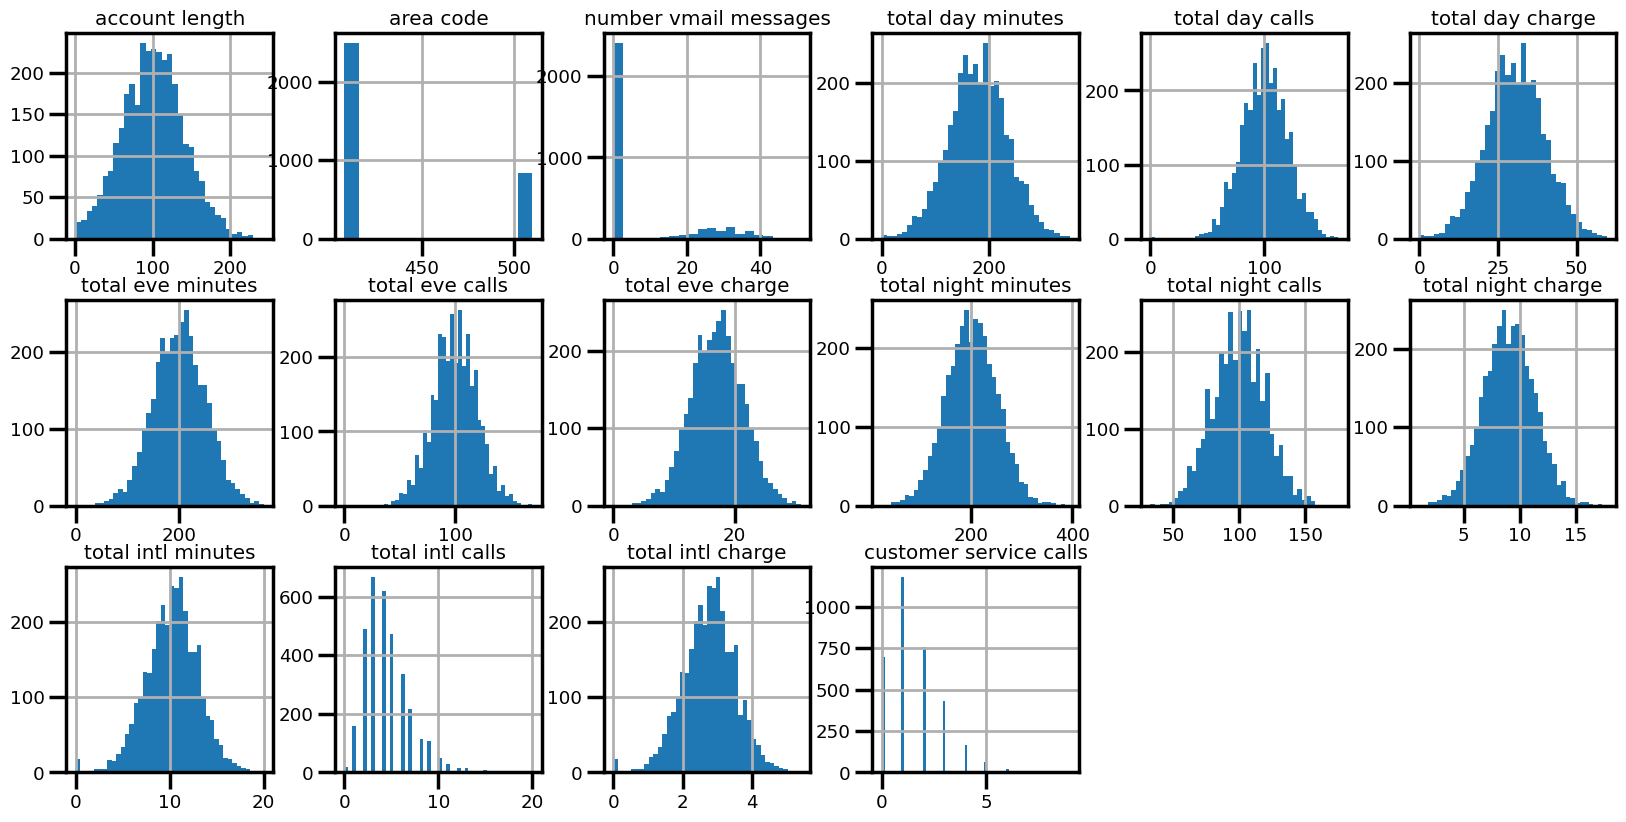

In [78]:
# Check the distribution of the data
churn_data.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()

`Observation`:
Majority of the columns in the dataset seems to be normally distributed except for  area code,number of vmail messages  ,total intl calls  and customer service calls they all  have a positive skewness or a right skewness.

### Data cleaning


In [79]:
# Create a new dataframe of the raw data to clean
data = churn_data.copy()

#### we start by checking for the missing values  and duplicated values in the dataset

In [80]:
#creating a function to check for any missing values and duplicates in our data
def data_cleaning(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"Number of missing values :{missing_values}\nNumber of duplicated:{duplicated_values}")
data_cleaning(data)

Number of missing values :0
Number of duplicated:0


##### Identifying  outliers

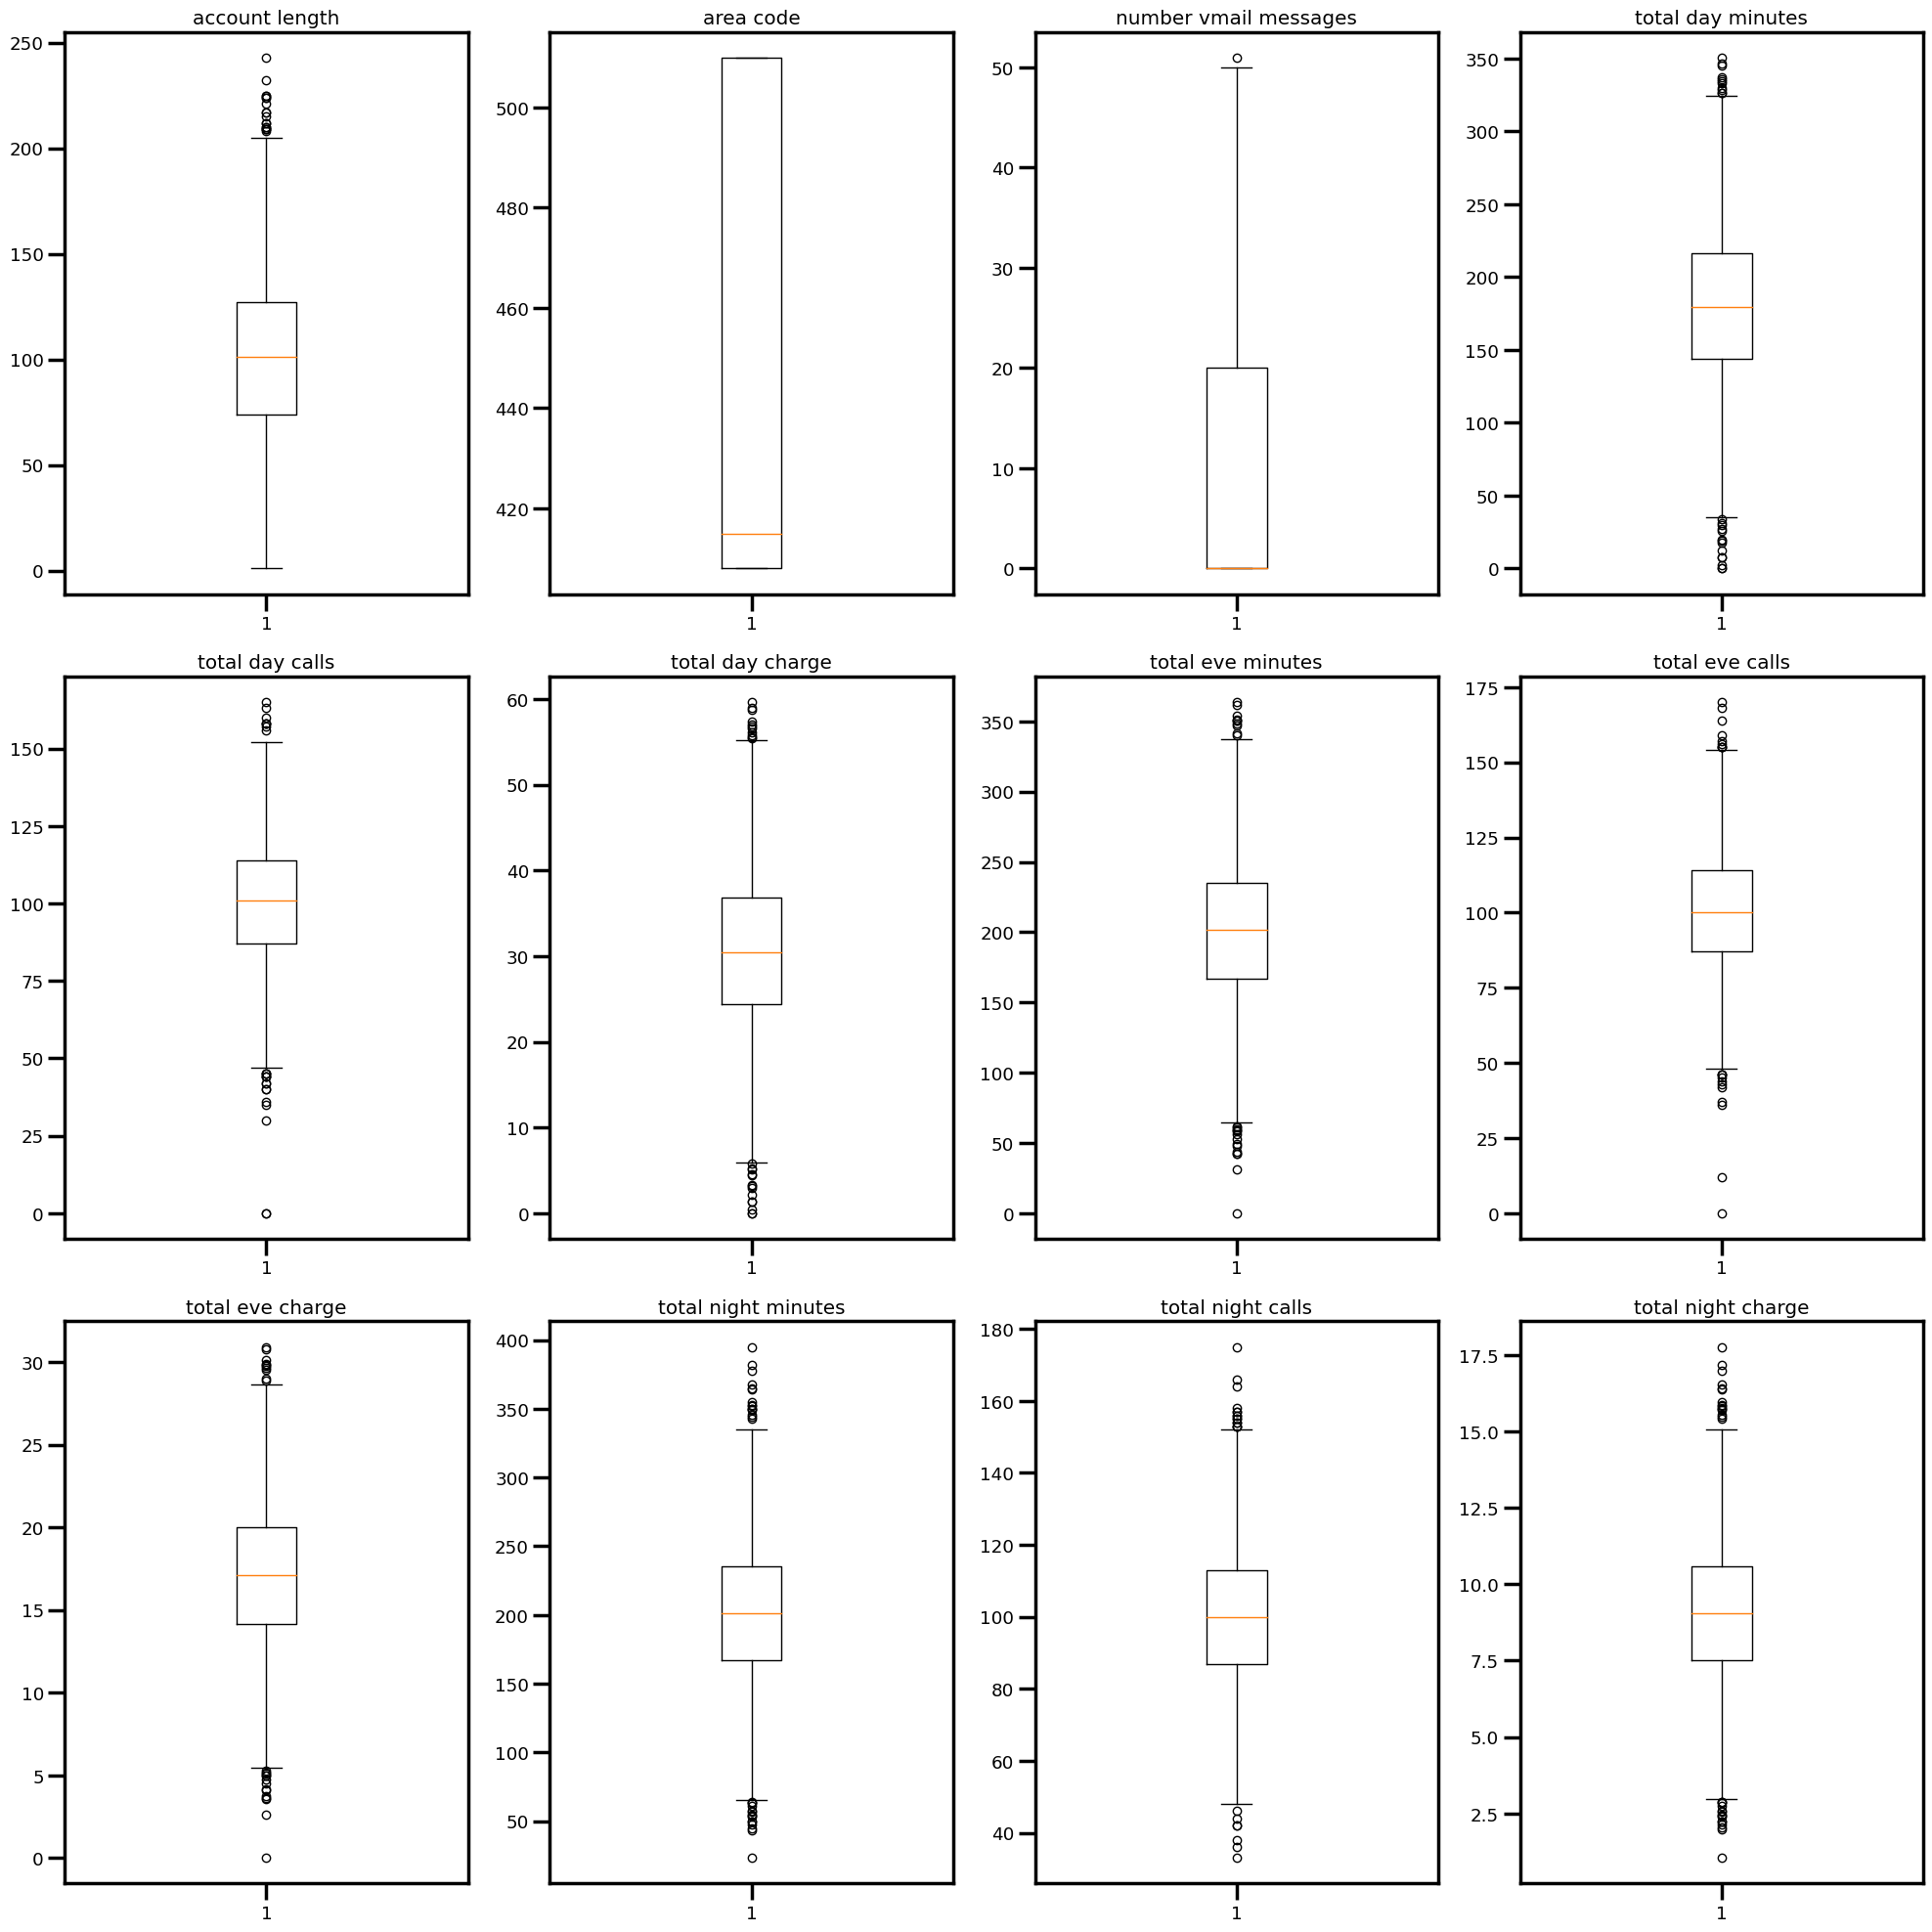

In [81]:
#Checking for outliers
numerical_cols = data.select_dtypes(include="number")

# Create a figure and subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

# Plot the boxplots
for ax, col in zip(axes.ravel(), numerical_cols.columns):
    ax.boxplot(data[col].astype(float))
    ax.set_title(col)

# Tighten the layout
plt.tight_layout()

# Show the figure
plt.show()

`Observation`:
 we are not  going to drop the outliers cause customers have freedom  to use the SyriaTel service upto their maximum satisfaction of their needs hence the usage or the charges can't be the same to all cusomers since the needs differs and also for the case of customer service calls they were being served by different customer service representatives 

In [82]:
# dropping the phone number column because  it shouldn't be a reason why customer is choosing to churn.
dropped = data.drop('phone number',axis = 1, inplace =True)

## EDA Continuation

#### Categorical Columns

####    Churn

False    2850
True      483
Name: churn, dtype: int64


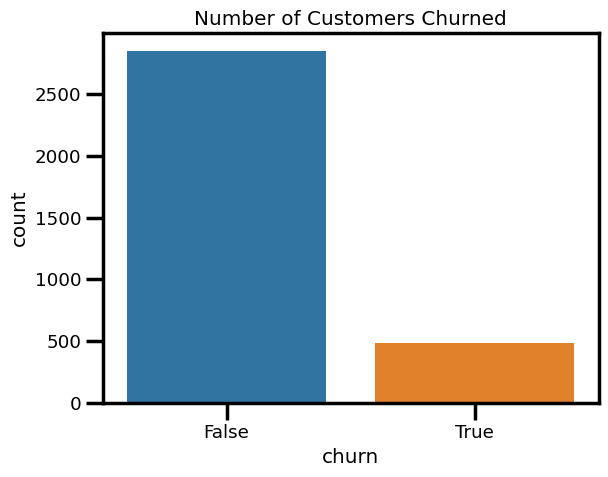

In [83]:
#ploting a countplot to  see the number of customers who churn
sns.countplot(data['churn'])
plt.title('Number of Customers Churned')
print(data['churn'].value_counts())


False    86.0
True     14.0
Name: churn, dtype: float64


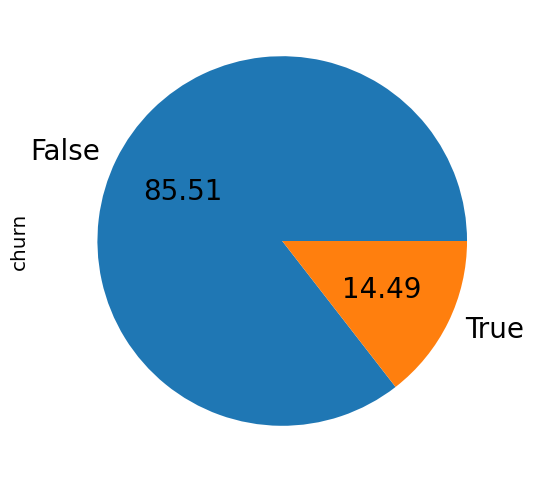

In [84]:
print(round(100*data['churn'].value_counts(normalize=True)))
data['churn'].value_counts().plot(kind='pie',labels = ["False", "True"],fontsize = 20 ,autopct = "%.2f",figsize=(6,6));

`Insight`:
From the pie chart above 14% of the customers churn while 86% customers not churn... This is a nice chance for SyriaTel to identify reasons why the customers are churning and carry out steps to stop or prevent more customers from churning before the rate increases rapidly

#### Customer's International Plan

In [85]:
int_plan_churn = pd.DataFrame(data.groupby(['international plan'])['churn'].mean())
print(int_plan_churn);

                       churn
international plan          
no                  0.114950
yes                 0.424149


It appears 42% customers with an international plan with SyriaTel, end up churning. On a business stand point, this may be a worthwhile topic to further investigate. 

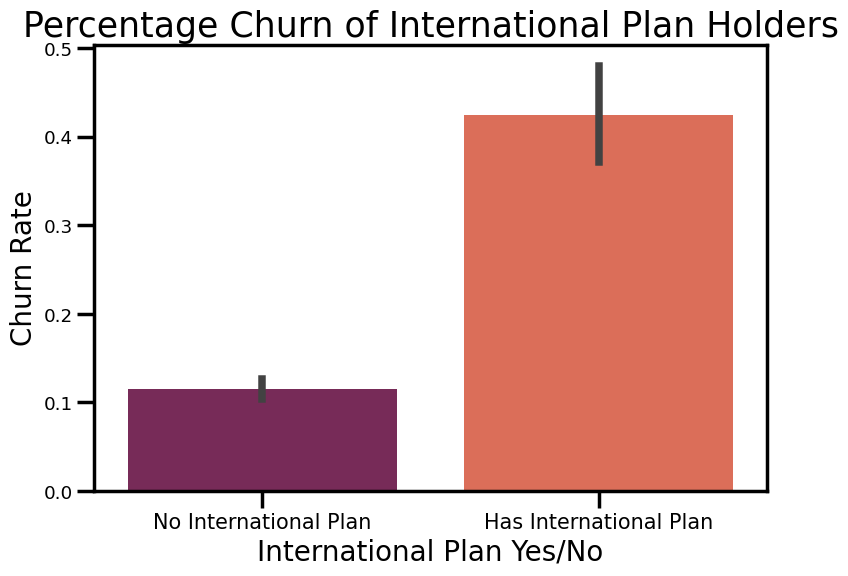

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="rocket", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout();

`Obervation`:
From the graph above majority of the customers holding international plan are churning because the services of SyriaTel are not fully satisfying them.
we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning resulting from it.

#### State

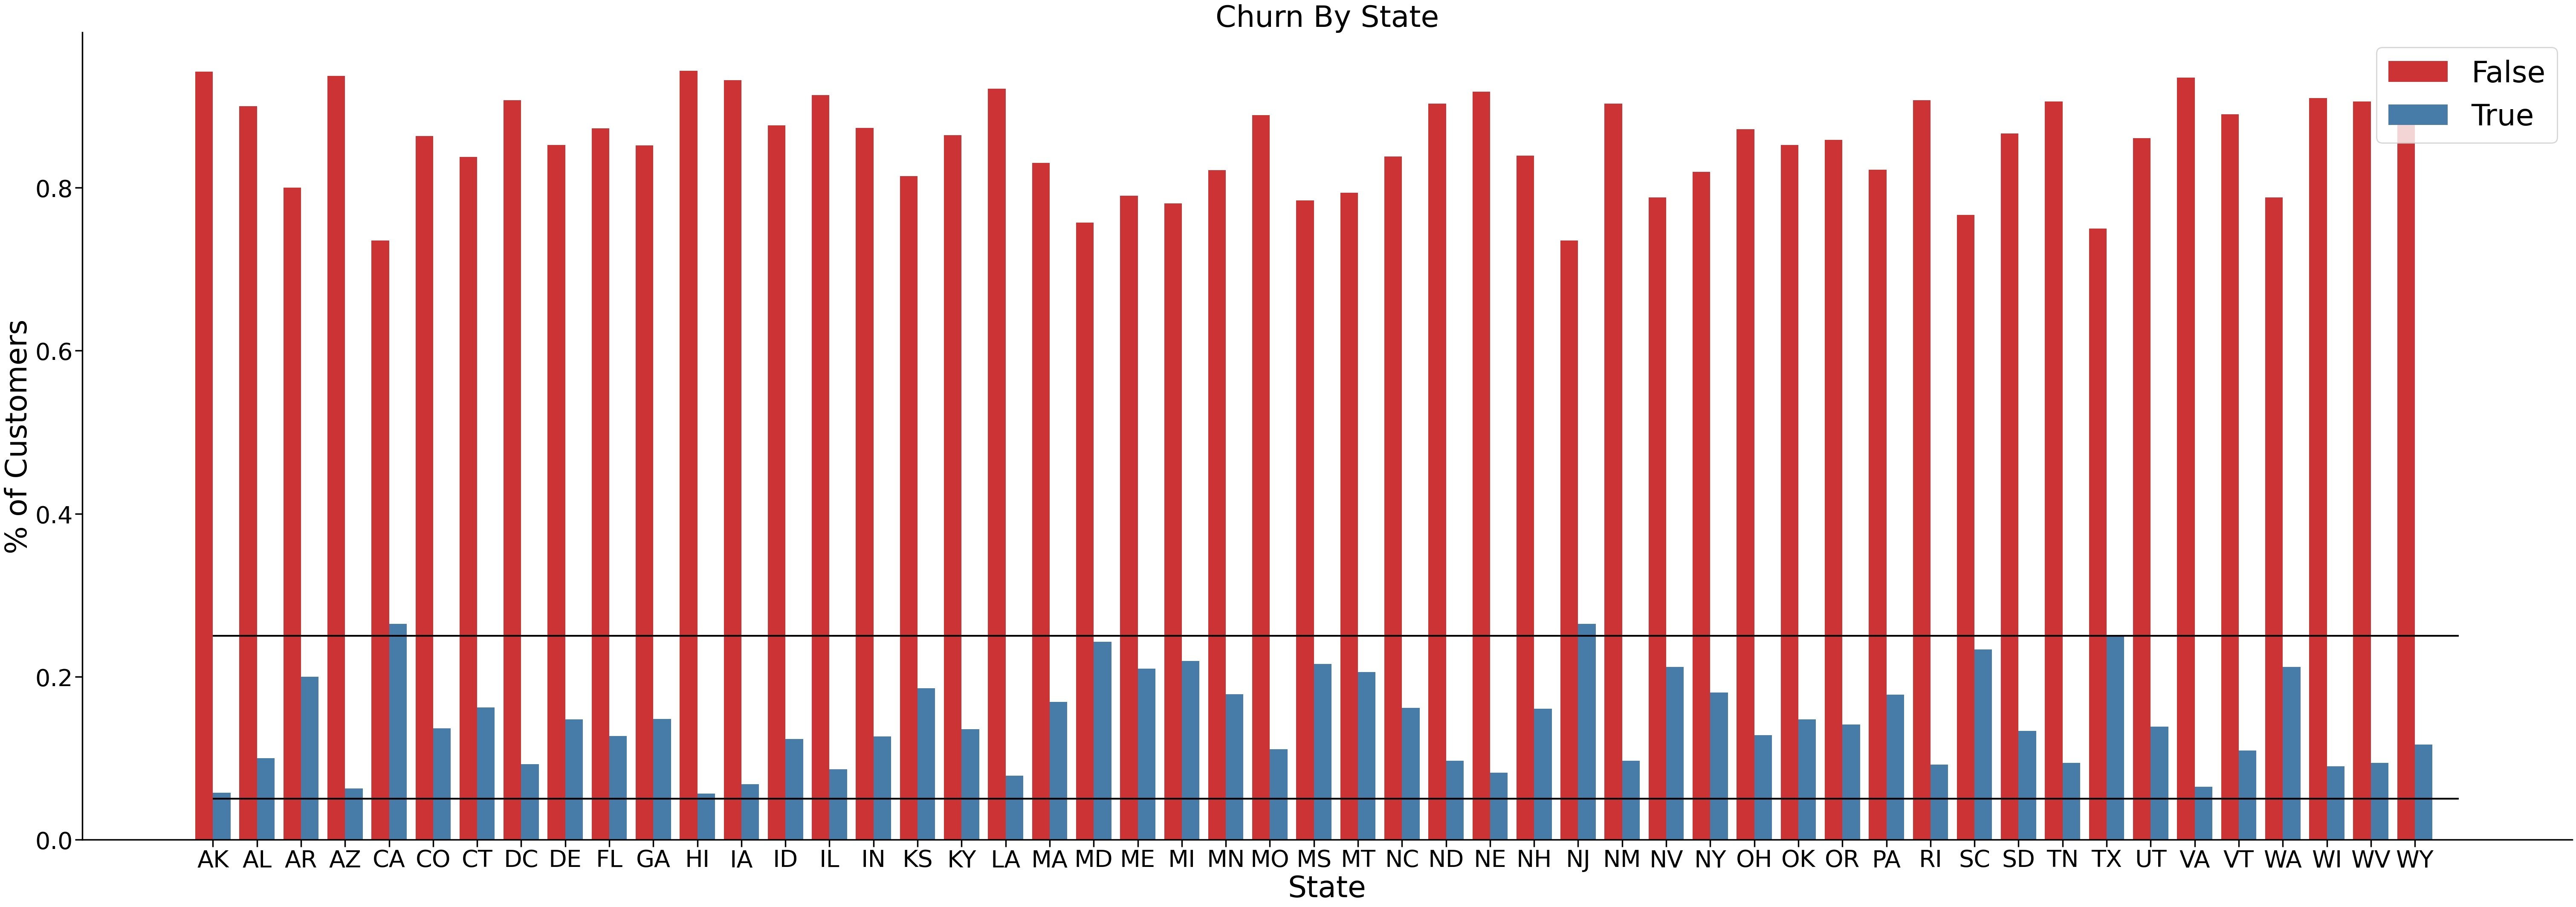

In [87]:
# churn rates group by states
State_Churn = data.groupby('state')['churn'].value_counts(normalize=True)
State_Churn = pd.DataFrame(State_Churn)
State_Churn.columns = ['Value']
State_Churn = State_Churn.reset_index()


sns.set_context('poster', font_scale = 0.6)
g = sns.catplot(data = State_Churn, kind = 'bar', x = 'state', y = 'Value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Churn By State', fontsize = 50)
plt.ylabel('% of Customers', fontsize = 50)
plt.xlabel('State', fontsize = 50)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40) 
plt.legend(fontsize = 50)
g._legend.remove()
plt.hlines(y = 0.25, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.05, xmin=0, xmax=51, color='black');

`Observation`: The percentage of the customer  not churning is higher in all the states  than customers churning.


#### Numerical Columns

#### Voicemail Plans

# of customers with voicemail plan: 0
# of customers with no voicemail plan: 0


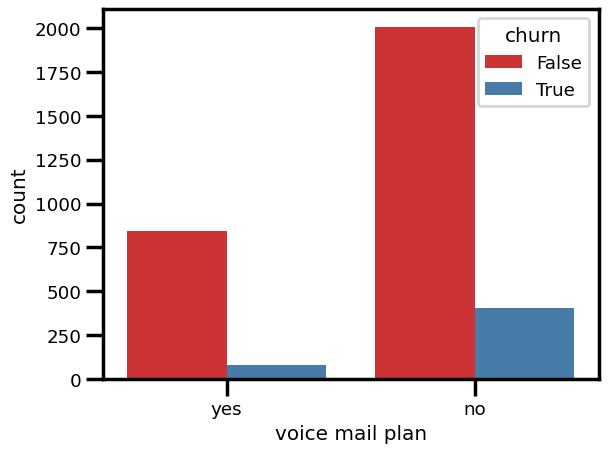

In [88]:
# with vs without voicemail plans customers
voicemail_plan = data[data['voice mail plan'] == 1]
print('# of customers with voicemail plan:', len(voicemail_plan))
no_voicemail_plan = data[data['voice mail plan'] == 0]
print('# of customers with no voicemail plan:', len(no_voicemail_plan))
sns.set_context('poster', font_scale = 0.6)
sns.countplot(x = 'voice mail plan', hue = 'churn', data = data, palette = 'Set1');

`Observation`:The percentage of customers who churned with voicemail plans is larger than those who churned without voicemail plans. This is definitely a useful column to use in our modeling .

In [89]:
# churn rates by voicemail plan
Churn_By_Voicemail_Plan = data.groupby('voice mail plan')['churn'].value_counts(normalize=True)
Churn_By_Voicemail_Plan = pd.DataFrame(Churn_By_Voicemail_Plan)
Churn_By_Voicemail_Plan.columns = ['value']
Churn_By_Voicemail_Plan = Churn_By_Voicemail_Plan.reset_index()
Churn_By_Voicemail_Plan 

,voice mail plan,churn,value
0,no,False,0.832849
1,no,True,0.167151
2,yes,False,0.913232
3,yes,True,0.086768


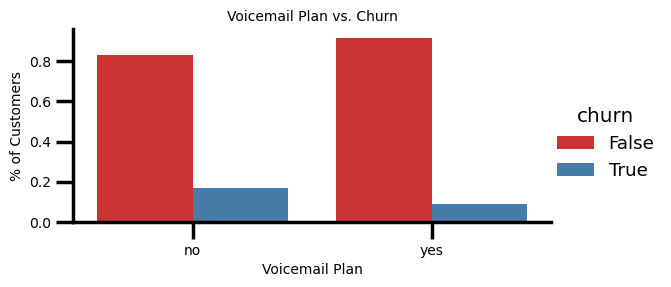

In [90]:
sns.set_context('poster', font_scale = 0.6)
sns.catplot(data = Churn_By_Voicemail_Plan, kind = 'bar', x = 'voice mail plan', y = 'value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=3, aspect=2)
plt.title('Voicemail Plan vs. Churn', fontsize = 10)
plt.ylabel('% of Customers', fontsize = 10)
plt.xlabel('Voicemail Plan', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show()

`Observation`:The percentage of customers who  are not churning  with voice mail plan is higher than the percentage of customers churning with a voicel mail plan.

#### Customer Service Calls

In [91]:
customer_service_call = pd.DataFrame(data.groupby(['customer service calls'])['churn'].mean())
customer_service_call

,churn
customer service calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


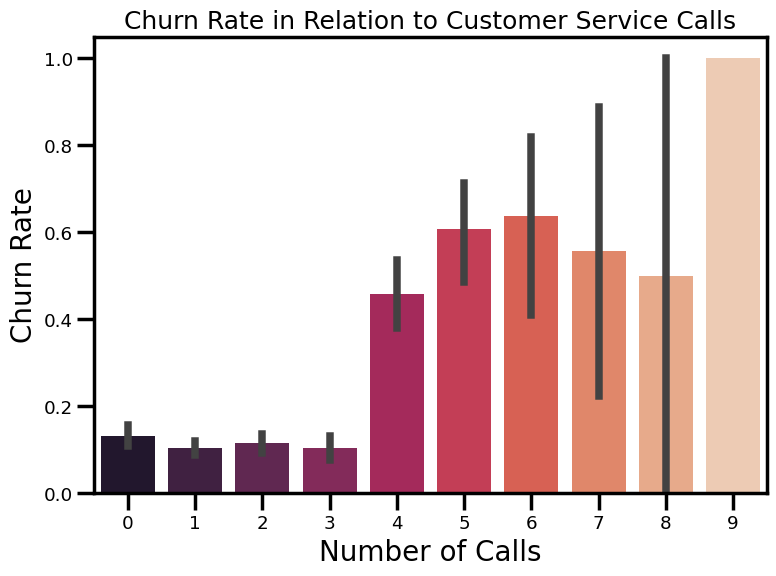

In [92]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['customer service calls'], y='churn',palette="rocket", ax = ax)
plt.title('Churn Rate in Relation to Customer Service Calls', fontsize=18)
plt.ylabel('Churn Rate', fontsize=20)
plt.xlabel('Number of Calls', fontsize=20)
plt.tight_layout();

Observation:From the graph ,We can see that  when a customer  calls to the customer  call service  four times, the likely hood of a customer to churn significantly increases. When a customer call a maximum of 9 customer calls, the churn rate reaches 100%. Looking at this in a business perspective, new strategies must be discussed to handle unhappy customers needs when they are calling the to customer service way past 4 customer calls.

#### Customer's Area code

area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


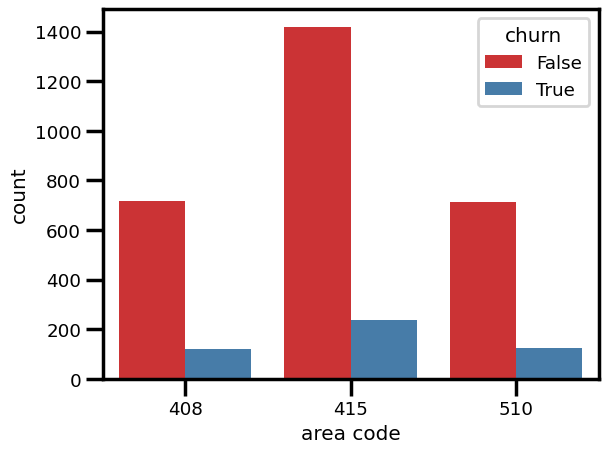

In [93]:
# percentage of churn by area code
print(data.groupby(["area code"])['churn'].mean())

sns.countplot(x='area code', hue='churn', data = data, palette = "Set1");

After further investigation, it is clear that the 415 area code has more customers than the 408 or 510 area codes. However, all three area codes have a 14% <b>churn rate</b>.  Since area codes had no influence on the churn rate, I think it is safe to remove the column from our dataset.. 
- <b>churn rate</b> – is the rate at which customers or clients are leaving a company within a specific period of time.

In [94]:
# Drop the area code column from the dataset
data.drop('area code', axis=1, inplace=True)

#### Customer Account Length

In [95]:
customer_acc_length = pd.DataFrame(data.groupby(['account length'])['churn'].mean())
customer_acc_length.value_counts().head(20)



churn   
0.000000    48
0.333333    11
0.200000    11
0.125000    10
0.142857     9
0.111111     8
0.076923     6
0.500000     5
0.166667     5
0.250000     5
0.181818     4
0.071429     4
0.117647     3
0.100000     3
0.160000     3
0.157895     3
0.133333     3
0.222222     3
0.235294     3
1.000000     3
dtype: int64

Mean Account Length for Not Churn    : 3.36
Std Dev Account Length for Not Churn : 1.33
Mean Account Length for Churn        : 3.42
Std Dev Account Length for Churn     : 1.32


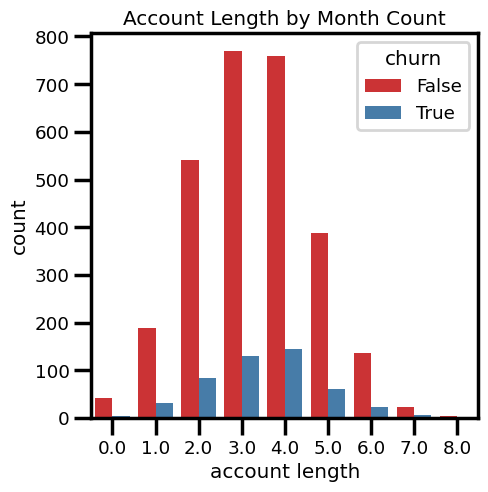

In [96]:

# change from day to month. 
Account_Lgth_Month = round(data['account length']/30)
# plot churn vs. not churn based on account length by month
plt.subplots(figsize = (5, 5))
sns.set_context('poster', font_scale = 0.6)
plt.title('Account Length by Month Count')
sns.countplot(x = Account_Lgth_Month, hue = 'churn', data = data, palette = 'Set1')

print('Mean Account Length for Not Churn    :', round((data[data['churn']==0]['account length']/30).mean(),2))
print('Std Dev Account Length for Not Churn :', round((data[data['churn']==0]['account length']/30).std(),2))
print('Mean Account Length for Churn        :', round((data[data['churn']==1]['account length']/30).mean(),2))
print('Std Dev Account Length for Churn     :', round((data[data['churn']==1]['account length']/30).std(),2))

`Observation`:
From the graph above majority of the customers who are churning have the lowest account length in SyriaTel that is 4 and below months.
The nature of this problem is framed by the fact that losing current customers is less expensive than gaining new customers,thus
taken under economic consideration, because if they were expensive then what was the point?Therefore we advice  SyriaTel to mantain  customers with high account lenth cause they are less likely to churn.

#### Total Day Charge

In [97]:
tdc = data.groupby(data['churn'])\
          ['total day charge'].mean().sort_values(ascending=False).reset_index()
tdc.head()

,churn,total day charge
0,True,35.175921
1,False,29.780421


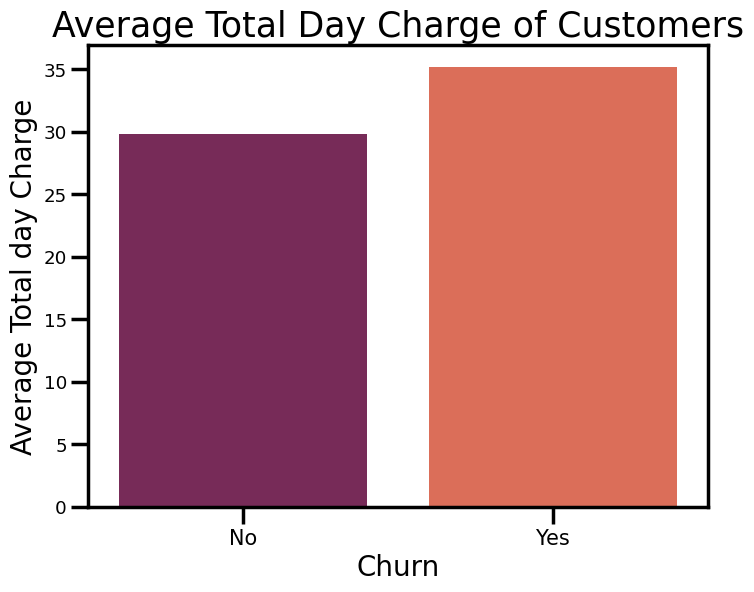

In [98]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y='total day charge', palette="rocket", ax = ax)
plt.title('Average Total Day Charge of Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Average Total day Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

`Insights`:
From the above graph the number of customer churning due to total day charge is high  with charge rate of 35.18 compared to customers not churning which is 29.78 charge rate Looking at this in a business perspective, new strategies must be discussed to handle unhappy customers due to total day charges whether  the charges are unfavourable.

Number Vmail Messages

In [99]:
# churn rates by number of voicemail messages
Churn_Vo_Qty = data.groupby('number vmail messages')['churn'].value_counts(normalize=True)
Churn_Vo_Qty = pd.DataFrame(Churn_Vo_Qty)
Churn_Vo_Qty.columns = ['value']
Churn_Vo_Qty = Churn_Vo_Qty.reset_index()

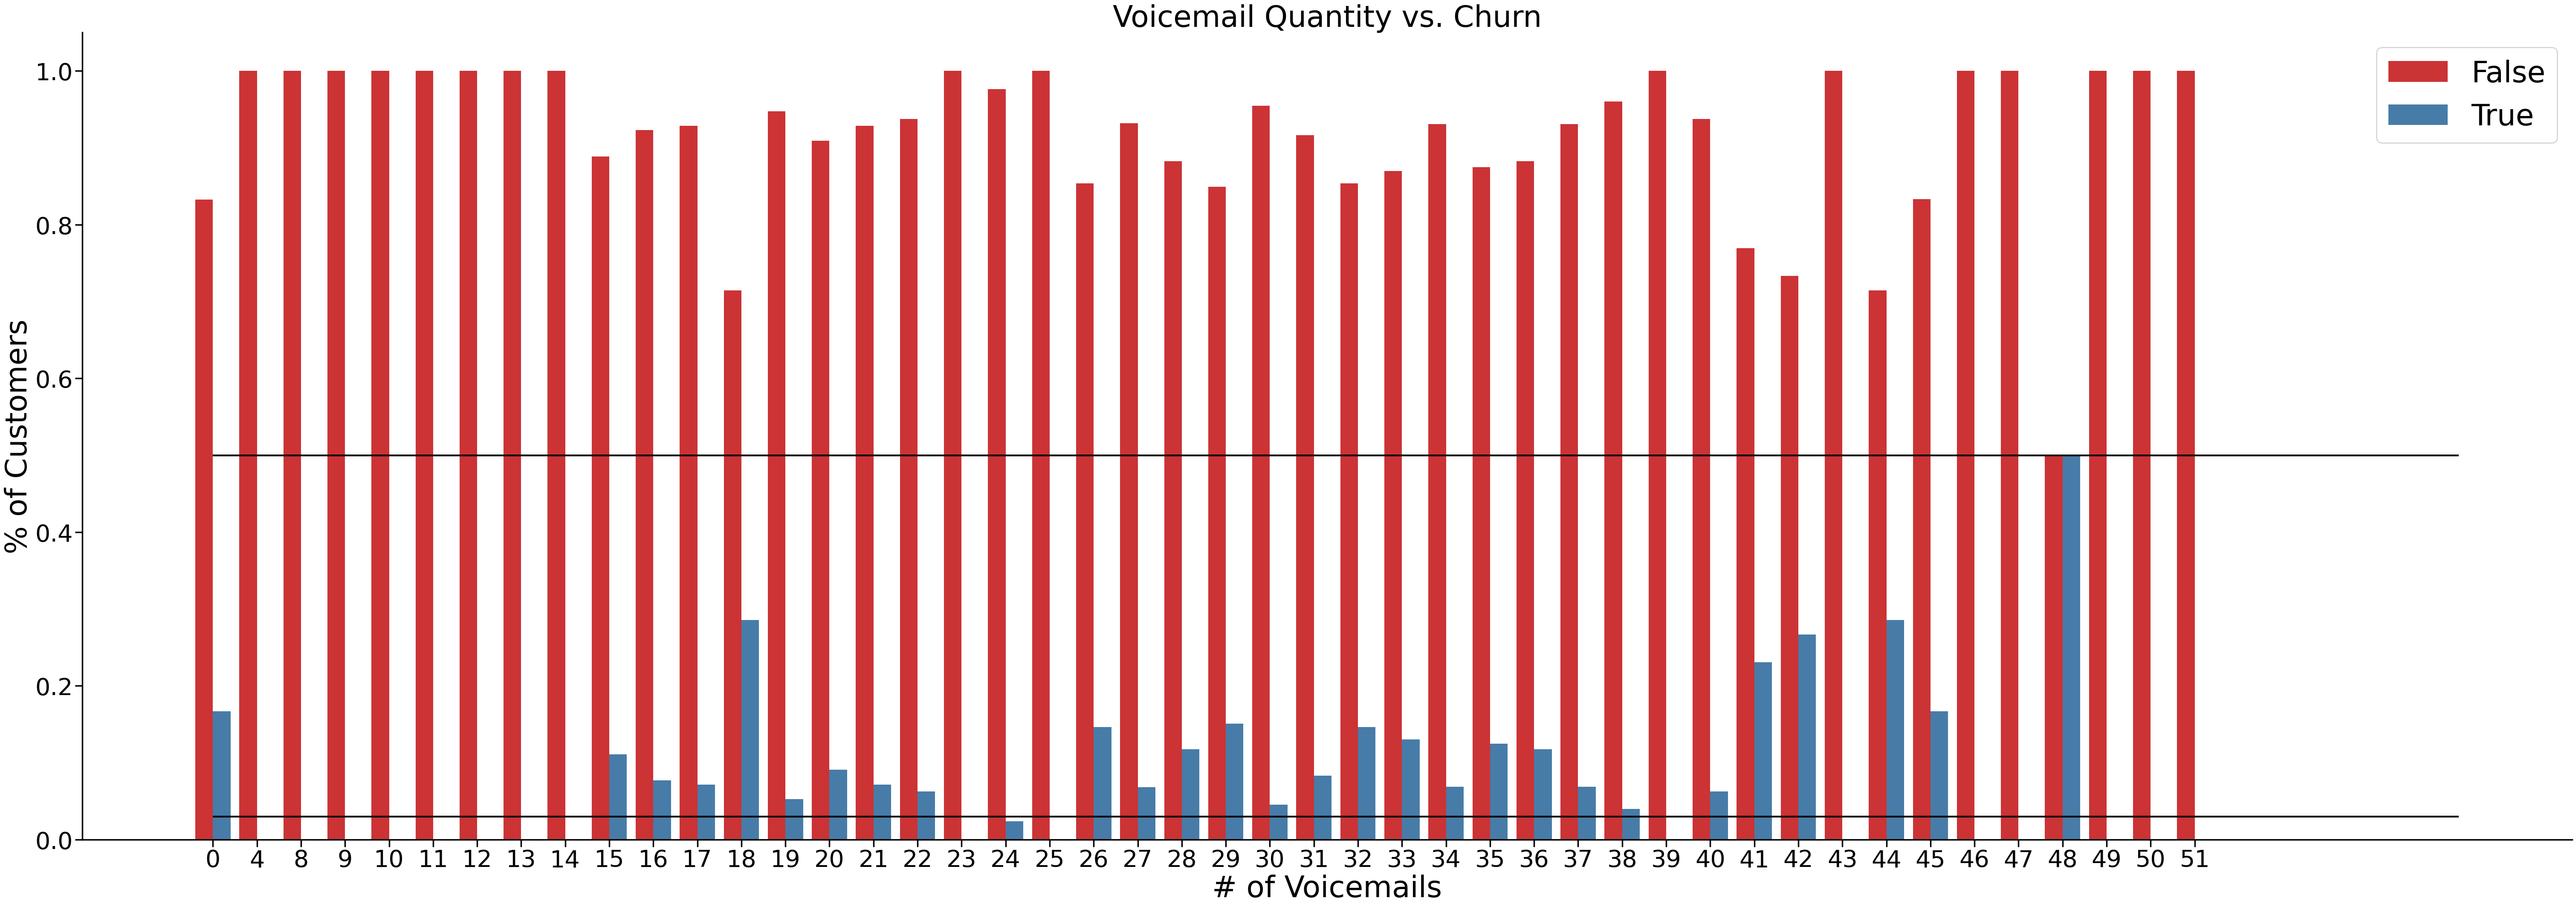

In [100]:
sns.set_context('poster', font_scale = 0.6)
g = sns.catplot(data = Churn_Vo_Qty, kind = 'bar', x = 'number vmail messages', y = 'value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Voicemail Quantity vs. Churn', fontsize = 50)
plt.ylabel('% of Customers', fontsize = 50)
plt.xlabel('# of Voicemails', fontsize = 50)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40) 
plt.legend(fontsize = 50)
g._legend.remove()
plt.hlines(y = 0.50, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.03, xmin=0, xmax=51, color='black')

`Observation`:
From the above graph the percentage of customer not churning is high in all the number of voicemails is hight than the percentage of customers churning ..However the rate of churning  in 48 voice mails is the highest.

#### Total International Charge

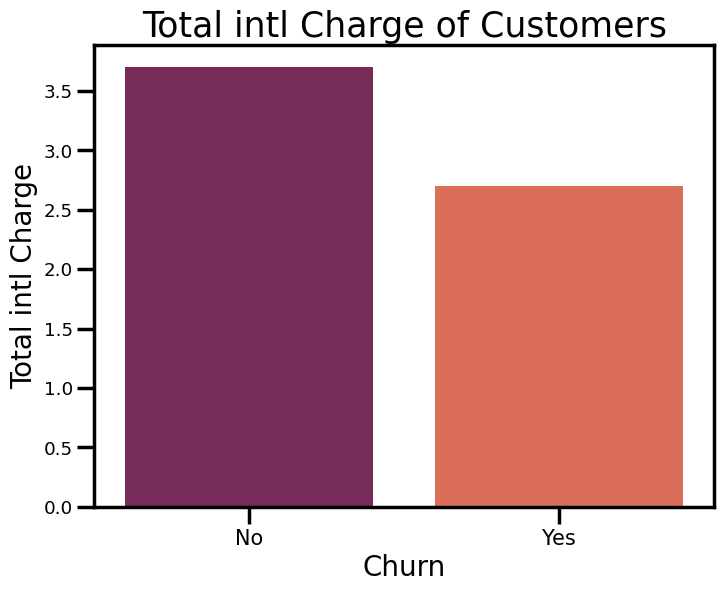

In [101]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y = data['total intl charge'], palette="rocket", ax = ax)
plt.title('Total intl Charge of Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Total intl Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

`Insights`:
From the graph above number of customers not churning due to  international charge is larger than the number of customers churning hence its clear to SyriaTel that the international charge has no influence to the  customer churning.

#### Total Evening Charges

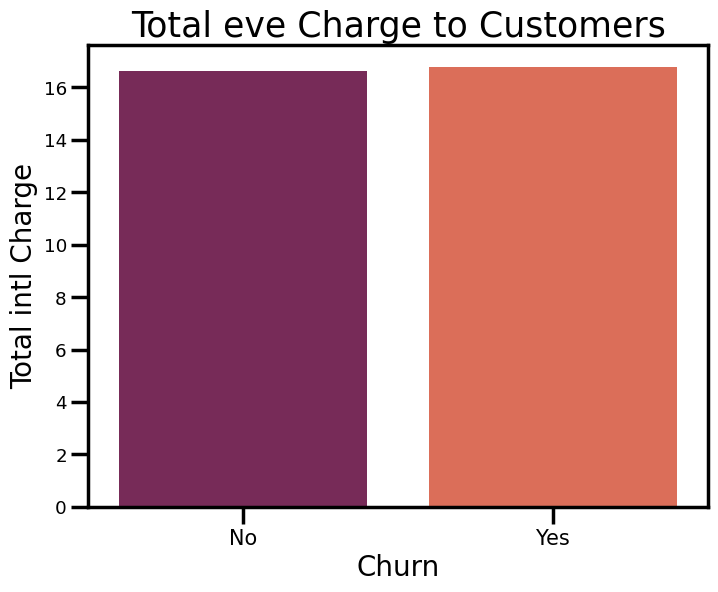

In [102]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y = data['total eve charge'], palette="rocket", ax = ax)
plt.title('Total eve Charge to Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Total intl Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

`Point to note`:
From the above graph it seems like the rate of customer churning and not churning due to evening charges is almost same .Therefore further research should be conducted so as to come out with clear insights on whether evening charges on the calls the customers make has influence in customer churning

#### Total Night Charge

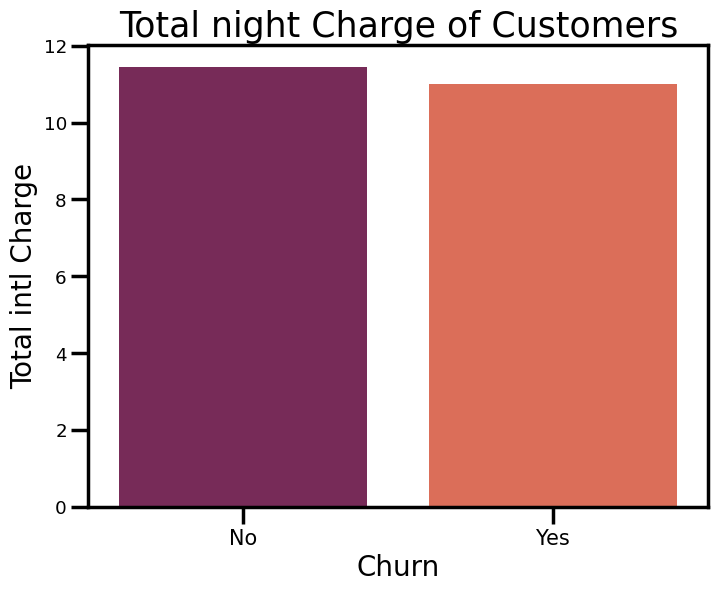

In [103]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y = data['total night charge'], palette="rocket", ax = ax)
plt.title('Total night Charge of Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Total intl Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

'Observation':
From the above graph the  rate of customers not churning due to night charge is higher than the rate of customers churning due  to night charges.Hence total night charge has no influence on the customer churning.

#### Map columns: International Plan, Voice Mail plan, and Churn

In [104]:
data['international plan'] = data['international plan'].map({'no': 0, 'yes': 1})
data['voice mail plan'] = data['voice mail plan'].map({'no': 0, 'yes': 1})
data['churn'] = data['churn'].map({False: 0, True: 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

`insights`:
 international plan, voice mail plan, and churn columns are no longer categorial now instead the are integers

#### Correlation Matrix

In [105]:
#plot correlation heatmap
data_correlation = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# convert all features that have a correlation to price of more than 0.3
data_correlation

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.00,0.02,0.00,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
international plan,0.02,1.00,0.01,0.01,0.05,0.00,0.05,0.02,0.01,0.02,-0.03,0.01,-0.03,0.05,0.02,0.05,-0.02,0.26
voice mail plan,0.00,0.01,1.00,0.96,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.02,-0.10
number vmail messages,-0.00,0.01,0.96,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
total day minutes,0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total day calls,0.04,0.00,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
total day charge,0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total eve minutes,-0.01,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
total eve calls,0.02,0.01,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01
total eve charge,-0.01,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09


You can see here that all *_minutes and *_charge features are perfectly correlated (r = 1). This is to be expected since charge is usually based on minutes.Thus, we may not need to include both the charge and minutes columns, but rather choose just one. We might also choose to aggregate all the day/eve/night columns into one 'total' column. As mentioned earlier, for a first simple model, we will leave the features as  they are, but for later iterations we might choose to aggregate and drop these.

# Modelling

#### Create dummy variables for state column

Before modeling, there is one column that must be dealt with. The state column is categorical, and needs to be converted to dummy variables and added to the dataframe

In [106]:
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [107]:
#state
data = pd.get_dummies(data,columns =['state'], drop_first = True)

### Prepare Data for Modeling 

Create X, y variables

In [108]:
#Below I am creating the target variable y, and the independant variables X.
X = data.drop(['churn'], axis=1)
y = data['churn']

#### Train, Test, Split

In [109]:
# splitting the data into a training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =1)

In [110]:
# check for imbalance of the training data
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    2281
1     385
Name: churn, dtype: int64


0    569
1     98
Name: churn, dtype: int64


In [111]:
y_test.value_counts()

0    569
1     98
Name: churn, dtype: int64

In [112]:
sm = SMOTE()
#fit
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

In [113]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.151935,-0.322178,-0.468118,-0.527126,0.062190,-0.184358,0.062619,-0.376031,1.669942,-0.375027,...,-0.106328,-0.098685,-0.116415,-0.115444,-0.117379,-0.112484,-0.115444,-0.110468,-0.140247,-0.12116
1,0.385162,3.103874,-0.468118,-0.527126,0.403849,0.174492,0.403989,-0.007703,-1.136947,-0.007279,...,-0.106328,-0.098685,-0.116415,-0.115444,-0.117379,-0.112484,-0.115444,-0.110468,-0.140247,-0.12116
2,0.411076,-0.322178,-0.468118,-0.527126,-1.436862,0.943457,-1.436524,0.030125,-0.489204,0.030199,...,-0.106328,-0.098685,-0.116415,-0.115444,-0.117379,-0.112484,-0.115444,-0.110468,-0.140247,-0.12116
3,-0.547747,-0.322178,-0.468118,-0.527126,-0.483812,-0.081830,-0.483573,-0.127161,-1.028990,-0.126738,...,-0.106328,-0.098685,-0.116415,-0.115444,-0.117379,-0.112484,-0.115444,-0.110468,-0.140247,-0.12116
4,-0.236777,3.103874,2.136215,3.153740,1.477870,-0.645738,1.478103,-0.143089,0.158540,-0.143135,...,-0.106328,-0.098685,-0.116415,-0.115444,-0.117379,-0.112484,-0.115444,-0.110468,-0.140247,-0.12116


### Baseline Model

#### Logistic Regression 

In [114]:
X1 = X_train_scaled
X2 = X_test_scaled
y1 = y_train_resample
y2 = y_test

In [115]:
def modelling(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resample
    y2 = y_test
    
    base_cv = cross_val_score(model, X_train_scaled, y_train_resample)
    
    model = model.fit(X1,y1)
    y_pred = model.predict(X2)

    return model, y_pred
    
    

In [116]:
def score(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resample
    y2 = y_test
      
    model = model.fit(X1,y1)
    scoring = model.score(X2, y2)
    model_cv = cross_val_score(model, X1, y1)

    return scoring,model_cv

In [117]:
def report(model):
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resample
    y2 = y_test
    
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    model_report = classification_report(y2, y_pred)
    model_roc_auc = roc_auc_score(y2, y_pred)
    
    return model_report, model_roc_auc

In [118]:
logreg = LogisticRegression(random_state=42)
score_result, cv_result = score(logreg)

report_result, roc_auc_result = report(logreg)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       569
           1       0.38      0.20      0.26        98

    accuracy                           0.83       667
   macro avg       0.63      0.57      0.59       667
weighted avg       0.80      0.83      0.81       667


ROC AUC Score:
0.5730425737957748


After running the classification report on our baseline model  the probability of customers not churning is 94% while the probability of the customers churning is 20%

In [119]:
y_pred = logreg.predict(X2)

In [120]:
def conf_matrix(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resample
    y2 = y_test
    
    pred = model.predict(X2)
    
    dis_estimator = ConfusionMatrixDisplay.from_estimator(model, X1, y1)
    dis_predictor = ConfusionMatrixDisplay.from_predictions(y2, pred)
    
    return dis_estimator, dis_predictor

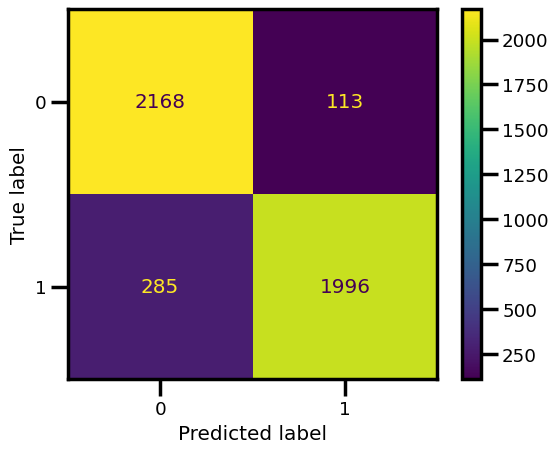

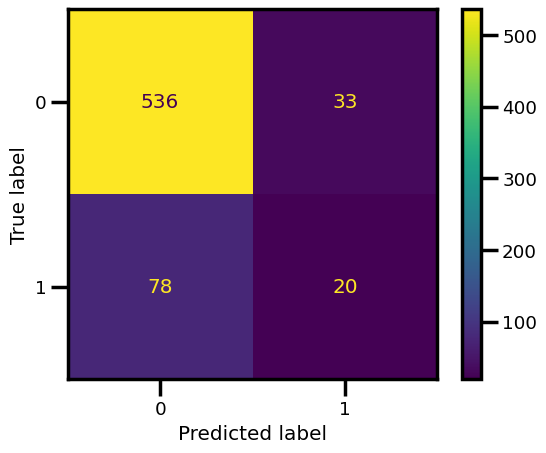

In [121]:
conf_matrix(logreg);

###  Model 1

#### `KNeighborsClassifier`

In [122]:
model1 = KNeighborsClassifier(n_neighbors=5)
report_result, roc_auc_result = report(model1)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       569
           1       0.40      0.10      0.16        98

    accuracy                           0.85       667
   macro avg       0.63      0.54      0.54       667
weighted avg       0.79      0.85      0.80       667


ROC AUC Score:
0.5378393888311035


After running the classification report on our KNeighborsClassifier  the probability of customers churning 10% which shows that the model  has performed poorly than the baseline whose recall was 20% .

In [123]:
# Scoring
model1 = KNeighborsClassifier(n_neighbors=5)
score_result, cv_result = score(model1)

print("Score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

Score:
	 0.8455772113943029

Cross Validation:
	 [0.57831325 0.97480832 0.98135965 0.97697368 0.98135965]


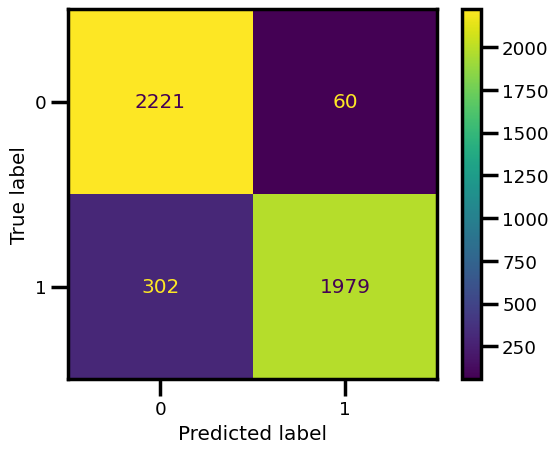

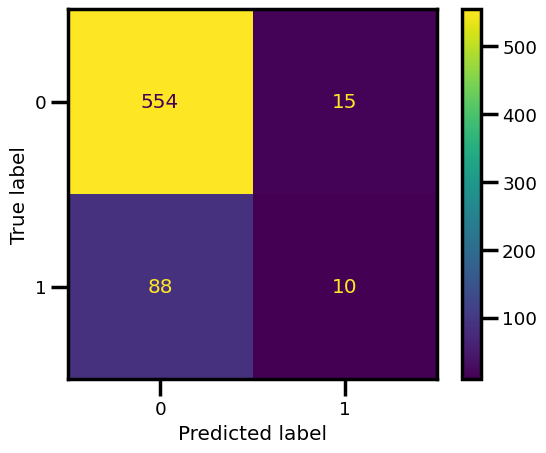

In [124]:
y_pred = model1.predict(X2)
conf_matrix(model1);

#### k-NN with Hyperparameter Tuning

In [125]:
grid_params = { 'n_neighbors' : [1,2,3,4,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [126]:
# fit the model on our train set
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train_scaled, y_train_resample)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [127]:
# find the best score
g_res.best_score_

0.9430144641683104

In [128]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [129]:
# use the best hyperparameters
knn_tuned = KNeighborsClassifier(n_neighbors = 3, weights = 'distance',metric = 'manhattan')
knn_tuned.fit(X_train_scaled, y_train_resample)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [130]:
# Scoring
knn_score = knn_tuned.score(X_train_scaled, y_train_resample)
knn_score

1.0

In [131]:
# classification report
y_pred = knn_tuned.predict(X2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       569
           1       0.47      0.16      0.24        98

    accuracy                           0.85       667
   macro avg       0.67      0.57      0.58       667
weighted avg       0.81      0.85      0.82       667



After tuning the  KNeighborsClassifier the probability of customers  churning is 16% which is an improvement from 10% recall for the previous.

### MODEL 2

#### Decision Tree Classifier

In [132]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
score_result, cv_result = score(model)

print("Tree_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

Tree_score:
	 0.8860569715142429

Cross Validation:
	 [0.77656079 0.83461117 0.81140351 0.80153509 0.80701754]


In [133]:
model_2 = DecisionTreeClassifier(random_state=42, max_depth=5)
report_result, roc_auc_result = report(model_2)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       569
           1       0.61      0.64      0.62        98

    accuracy                           0.89       667
   macro avg       0.77      0.79      0.78       667
weighted avg       0.89      0.89      0.89       667


ROC AUC Score:
0.7854004519206628


We have a much better recall score on our training data using the decision tree model. We improved from our baseline model from 20% to 64% with the decision tree model. 

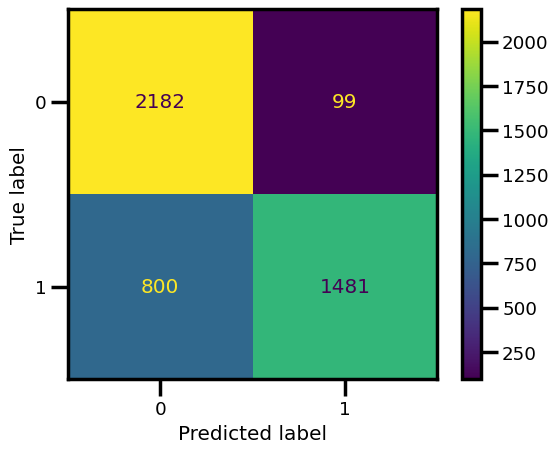

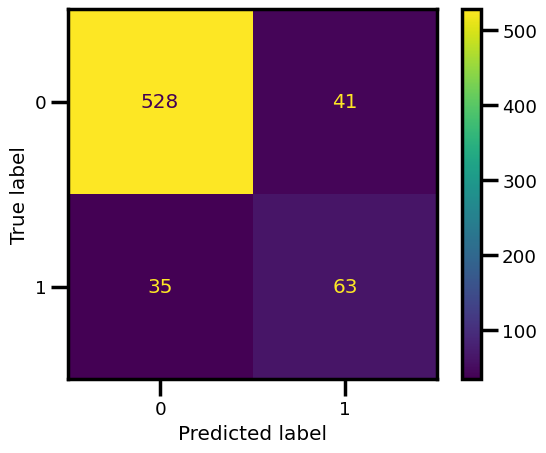

In [134]:
y_pred = model.predict(X2)
conf_matrix(model_2);

### Model 3: Random Frorest Classifier

In [135]:
model_3 = RandomForestClassifier(random_state=42)
score_result, cv_result = score(model)

print("Tree_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

Tree_score:
	 0.8860569715142429

Cross Validation:
	 [0.77656079 0.83461117 0.81140351 0.80153509 0.80701754]


In [136]:
model_3 = RandomForestClassifier(random_state=42)
report_result, roc_auc_result = report(model_3)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       569
           1       0.73      0.67      0.70        98

    accuracy                           0.92       667
   macro avg       0.84      0.82      0.83       667
weighted avg       0.91      0.92      0.91       667


ROC AUC Score:
0.8156450629460924


We have a much better recall score on our training data using the Random Forest model. We improved from our baseline model from 20% previously, to 67% with the Random Forest model.

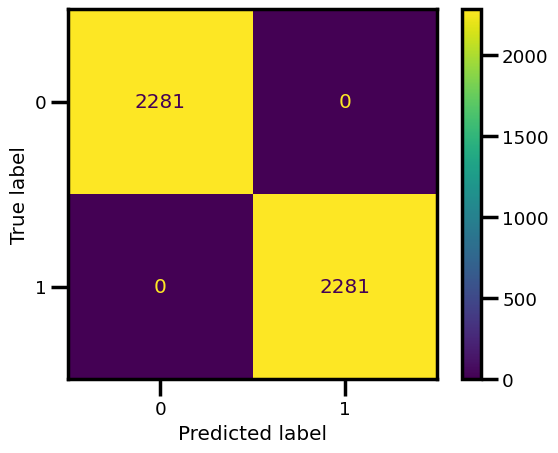

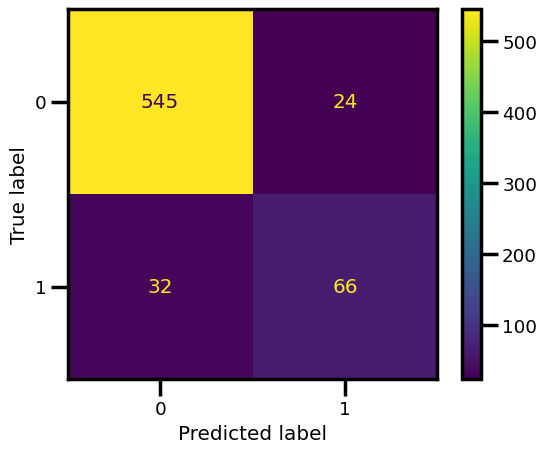

In [137]:

conf_matrix(model_3);

On our random forest model had a recall of 76% and this was an improvement from the baseline model but it performed poorly then decision tree.

#### DECISION TREE AND RANDOM FOREST HYPERPARAMETER TUNING

In [138]:
# Define the hyperparameter grids for the decision tree and random forest models
tree_param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
clf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV objects for the decision tree and random forest models
tree_grid_search = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5)
clf_grid_search = GridSearchCV(RandomForestClassifier(), tree_param_grid, cv=5)

# Fit the GridSearchCV objects to the training data
tree_grid_search.fit(X_train, y_train)
clf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best scores for the models
tree_best_params = tree_grid_search.best_params_
tree_best_score = tree_grid_search.best_score_
clf_best_params = clf_grid_search.best_params_
clf_best_score = clf_grid_search.best_score_

# Train the decision tree and random forest models with the best hyperparameters on the entire training dataset
tree_clf = DecisionTreeClassifier(**tree_best_params)
rf_clf = RandomForestClassifier(**clf_best_params)
tree_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions on the test data and evaluate the performance of the models using accuracy
tree_y_pred = tree_clf.predict(X_test)
rf_y_pred = rf_clf.predict(X_test)
tree_recall = recall_score(y_test, tree_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

# Compare the performance of the decision tree and random forest models based on recall and select the best one
if tree_recall > rf_recall:
    print('Decision tree is better, with recall:',tree_recall)
else:
    print('Random forest is better, with recall:',rf_recall)

Decision tree is better, with recall: 0.7244897959183674


After tuning the Decision tree and random forest  model, Decision tree performs better with a recall of 72%

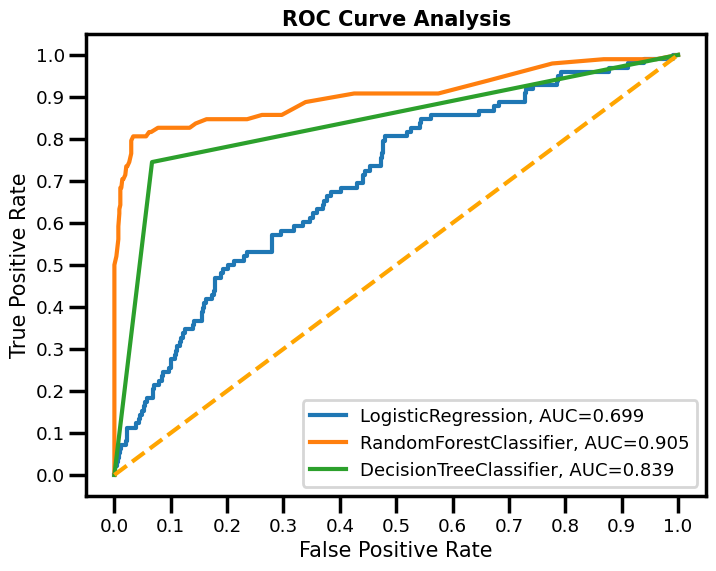

In [139]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

# Set the classifiers' names as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()


The ROC curve showcases the relationship between the true positive rate and the false positive rate of our classifier. The most effective models tend to exhibit a curve that tightly follows the upper-left section of the graph. In this particular case, the random forest classifier demonstrates this desirable characteristic.
The best model from the ROC Curve is Random Forest with an AUC 90.5%  followed by DecisionTreeClassifier with 81.6%.

#### Feature importance

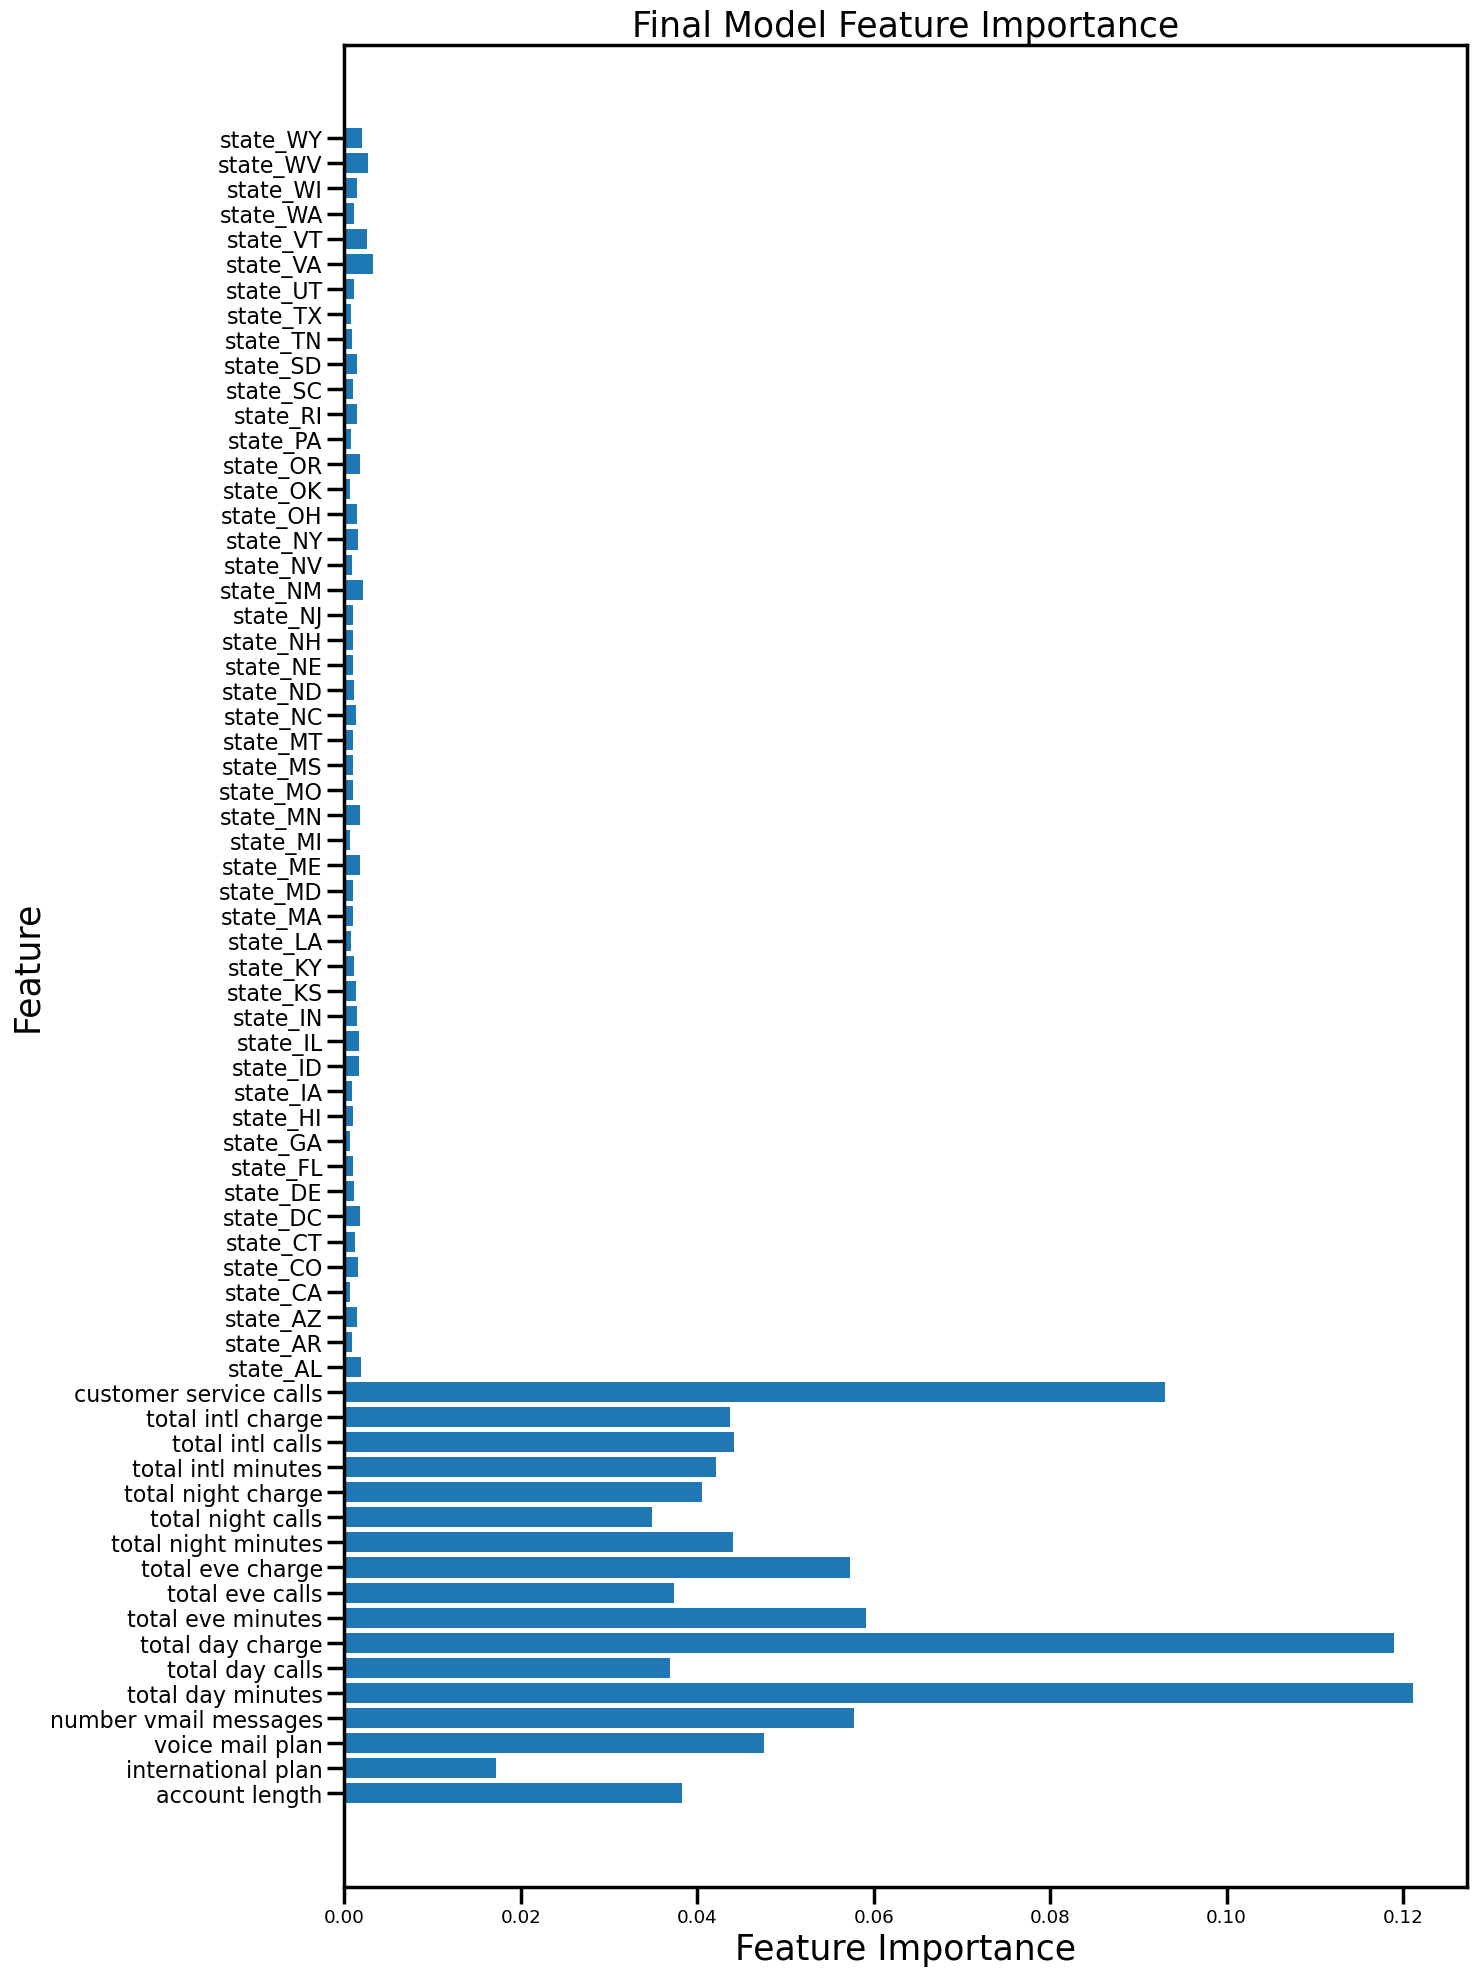

In [140]:
def plot_features_importances(model):
    n_features = X_test.shape[1]
    plt.figure(figsize=(15,20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns.values, fontsize = 16)
    plt.xlabel('Feature Importance', fontsize = 25)
    plt.ylabel('Feature', fontsize = 25)
    plt.title('Final Model Feature Importance', fontsize = 25)
    plt.tight_layout()
    
plot_features_importances(model_3)

From the graph,there are features that carry much weight compared to others  i.e
* customer service calls
* Total day minutes
* Total day charg

### Model Results
* Logistic Regression
Recall score(test) = 20%

* KNearestNeighbor
Recall score = 1%

* Decision Tree
Recall score(test) = 64%

* Random Forest
Recall score (test)= 67%

* Random Tree with Gridsearch CV
Recall score (test)= 72%

#### Evaluation of the models

* In the case of Syria Tel where the goal is to identify customer who are about to churn i.e identifying the customers who are likely to take off from the Syria Tel .In many cases, prioritizing high recall is more crucial than high precision. This means that a model with high recall aims to minimize false negatives, placing greater importance on correctly identifying positive instances and reducing the chances of incorrectly classifying them as negative. This emphasis on recall is particularly relevant when the consequences of missing positive instances are significant or when the cost of false negatives is considerable.
Syriatel has an opportunity to proactively implement measures to retain its customers before the churn rate escalates rapidly. This allows Syriatel to take preventive actions aimed at minimizing customer attrition and ensuring their continued loyalty

* To achieve high recall, the model needs to accurately identify customers who are at risk of churning. After balancing our data, the baseline model achieved a recall of 20%. By tuning the hyperparameters, the K-Nearest Neighbor model improved its recall to 16%, making it more effective in predicting unseen data. Additionally, I experimented with the Decision Tree classifier, which outperformed K-Nearest Neighbor with an impressive recall of 64%. Lastly, I tried the Random Forest model, which had a recall of 67% . After ploting roc curve Random Forest  emerged as the best model for predicting unseen data, with a AUC of 90.5%.

# Conclusion

Customers are important to any business and investing on ways to mitigate churn is crucial. Syrial Tel can employ the recommended steps to mitigate churn which will inturn increase its sales.The Customer service acknowledgement  is important and can make or break a business. The customers at Syrial Tel could be calling because they already have an issue with Syria services and whether they churn or not depends mostly on how they were handled and whether the issues were fixed. Good customer service means a better resolution and satisfaction and that will prevent a customer from churning. Customers who spend more will feel more appreciated and recognized when they are rewarded.

# Recommendation

I recommend  SyriaTel to determine if international plans are meeting the customers needs since it seems it has highest rate of customer churning.
Implement new plan features  in the international plans or conduct a research engaging the international plan holders for both churn and not churn to identify where the SyriaTel ain't meeting the customers needs

Manager of the customer service department  must strategize to  conduct efficient training to the customer calls attentant so as to equip them with skills to enable them in handling customer service calls with the goal of reducing the number of calls a customer calls in regards to their services. 

I recommend SyriaTel to explore ways to retain customers by creatig new incentives to customers who have an average total day charge of $35  so as to reduce their high rate of churning.